# 電腦數學符號運算

### 第3節. 一元一次不等式實作
安裝 Python 3.8.7
- pip install numpy
- pip install sympy
- pip install jupyterlab
- lib.py 
fx=parse_expr("2*x-3 > 2" , evaluate=False)
solve_univariate_inequality(fx ,x)  

程式一   
一元一次不等式 ax + b >= c 求解

題目: 1𝑥+0<−9   
作答: x<-9   
電腦答案: (-oo < x) & (x < -9)  


In [8]:
import re
import random                                     #亂數 
import sympy as sp                                #sympy 簡易別名 sp    
import numpy as np
import lib
from lib import GetTE
from sympy.parsing.sympy_parser import parse_expr #文字字串, 解釋成, Sympy 運算式
from sympy.solvers.inequalities import solve_univariate_inequality
sp.init_printing("mathjax")                       #sp.init_printing()  168 
from IPython.display import Latex,HTML,Markdown 

x=sp.symbols('x')

St=(2*x-4)*(3*x-6) > 0

Val=solve_univariate_inequality(St,x)

display(St)
display(Val)


In [7]:
import re
import random                                     #亂數 
import sympy as sp                                #sympy 簡易別名 sp    
import numpy as np
import lib
from lib import GetTE
from sympy.parsing.sympy_parser import parse_expr #文字字串, 解釋成, Sympy 運算式
from sympy.solvers.inequalities import solve_univariate_inequality
sp.init_printing("mathjax")                       #sp.init_printing()  168 
from IPython.display import Latex,HTML,Markdown 

x=sp.symbols('x')
fx=(2*x-4)*(3*x-6) > 0
TE={}
TE["St"]=fx
Val=solve_univariate_inequality(fx,x)
TE["Val"]=Val
TE["OK"]=0
TE["Ans"]=""
print(TE)

def Text2Inequ(ans):
      
    ans = re.sub(r",", r"|", ans)
    r3=re.findall('x[ ]*[≠][ ]*[-]?\d+[ ]*[/]?[ ]*\d*', ans)
    for l_ in r3:
        s_="Ne(%s)" % l_.replace('≠',",")
        ans=ans.replace(l_,s_)
    r3=re.findall('x[ ]*[!][=][ ]*[-]?\d+[ ]*[/]?[ ]*\d*', ans)
    for l_ in r3:
        s_="Ne(%s)" % l_.replace('!=',",")
        ans=ans.replace(l_,s_)           
    ans = re.sub(r"[<][ ]*x[ ]*[<]", r"<x & x<", ans)
    ans = re.sub(r"[>][ ]*x[ ]*[>]", r">x & x>", ans)
    if ans.strip() == "": return "(-oo < x) & (x < oo)"
    if ans.strip() == "": return "-3.1415926"
    ans = re.sub(r"X", r"x", ans)
    ans = re.sub(r"(\d)x", r"\1*x", ans)
    ans = ans = re.sub(r"[)][(]", r")*(", re.sub(r"(\d)x", r"\1*x", ans))
    ans=re.sub(r"x[(]", r"x*(", ans)
    ans = re.sub(r"x[ ]*", r"x", ans)
    ans = ans.replace(r"x^", r"x**")
    ans = re.sub(r"Y", r"y", ans)
    ans = re.sub(r"(\d)y", r"\1*y", ans)
    ans = ans = re.sub(r"[)][(]", r")*(", re.sub(r"(\d)y", r"\1*y", ans))
    ans=re.sub(r"y[(]", r"y*(", ans)
    ans = re.sub(r"y[ ]*", r"y", ans)
    ans = ans.replace(r"y^", r"y**")   
    ans=re.sub(r"(\d)[(]", r"\1*(", ans)
    ans=re.sub(r"(\d)J[(]", r"\1*J(", ans)
    ans = ans.replace(r"J(", r"sqrt(")
    return ans

def Text2Inequ(ans):
    if ans == "" or  ans == "R" or ans == "r": return "(-oo < x) & (x < oo)"  
    ans = re.sub(r",", r"|", ans)
    
    r3=re.findall('x[ ]*[≠][ ]*[-]?\d+[ ]*[/]?[ ]*\d*', ans)
    for l_ in r3:
        s_="Ne(%s)" % l_.replace('≠',",")
        ans=ans.replace(l_,s_)
    r3=re.findall('x[ ]*[!][=][ ]*[-]?\d+[ ]*[/]?[ ]*\d*', ans)
    for l_ in r3:
        s_="Ne(%s)" % l_.replace('!=',",")
        ans=ans.replace(l_,s_)
    
    ans = re.sub(r"[<][ ]*x[ ]*[<]", r"<x & x<", ans)
    ans = re.sub(r"[>][ ]*x[ ]*[>]", r">x & x>", ans)
    if ans.strip() == "": return "(-oo < x) & (x < oo)"
    if ans.strip() == "": return "-3.1415926"
    
    ans = re.sub(r"X", r"x", ans)
    ans = re.sub(r"(\d)x", r"\1*x", ans)
    ans = ans = re.sub(r"[)][(]", r")*(", re.sub(r"(\d)x", r"\1*x", ans))
    ans=re.sub(r"x[(]", r"x*(", ans)
    ans = re.sub(r"x[ ]*", r"x", ans)
    ans = ans.replace(r"x^", r"x**")

    ans = re.sub(r"Y", r"y", ans)
    ans = re.sub(r"(\d)y", r"\1*y", ans)
    ans = ans = re.sub(r"[)][(]", r")*(", re.sub(r"(\d)y", r"\1*y", ans))
    ans=re.sub(r"y[(]", r"y*(", ans)
    ans = re.sub(r"y[ ]*", r"y", ans)
    ans = ans.replace(r"y^", r"y**")
    
    ans=re.sub(r"(\d)[(]", r"\1*(", ans)
    ans=re.sub(r"(\d)J[(]", r"\1*J(", ans)
    ans = ans.replace(r"J(", r"sqrt(")
    return ans

def Put_Expr_InequV1(TE):
    x = sp.symbols('x')
    Val = TE["Val"]
    Flag = False
    ans = TE["Ans"]
    ans = Text2Inequ(TE["Ans"])
    a1 = ans.split("|")
    a2 = ans.split("&")
    try:
        if len(a1) > 1:
            a_ = []
            for aa_ in a1:
                a_.append(sp.solve(aa_))
            Flag = (a_[0] | a_[1]) == Val
        elif len(a2) > 1:
            a_ = []
            for aa_ in a2:
                a_.append(sp.parse_expr(aa_))
            Flag = reduce_rational_inequalities([[a_[0], a_[1]]], x) == Val
        elif ans == '空集' or ans == '0'  or ans=='False' or ans=="false":
            if str(Val) == "False":
                Flag = True
        else:
            Flag = sp.solve(ans) == Val
        if Flag:  # 比對答案:
            TE["OK"] = 1
        else:  # 不則
            TE["OK"] = 0
    except:
        pass


ans="x ≠  2"   # "Ne(x,2)"
ans="x !=  2"  # "Ne(x,2)"
TE["Ans"]=ans
Put_Expr_InequV1(TE)
print(TE)


{'St': (2*x - 4)*(3*x - 6) > 0, 'Val': (x > -oo) & (x < oo) & Ne(x, 2), 'OK': 0, 'Ans': ''}
{'St': (2*x - 4)*(3*x - 6) > 0, 'Val': (x > -oo) & (x < oo) & Ne(x, 2), 'OK': 1, 'Ans': 'x !=  2'}


In [5]:
import random                                     #亂數 
import sympy as sp                                #sympy 簡易別名 sp    
import numpy as np
import lib
from lib import GetTE
from sympy.parsing.sympy_parser import parse_expr #文字字串, 解釋成, Sympy 運算式
from sympy.solvers.inequalities import solve_univariate_inequality
sp.init_printing("mathjax")                       #sp.init_printing()  168 
from IPython.display import Latex,HTML,Markdown                 #網頁顯示數學符號
"""程式一
一元一次不等式 ax + b >= c 求解
"""

def Get_PF501_Expr(QN,Tx=-1):
    x=sp.symbols('x')
    NTE=[]
    for i in range(0,QN):
        ai=np.random.choice(range(-4,4),12)
        if Tx==0:
            op=random.choice([">","<"])
            express_str=f" ({ai[0]}*x + {ai[1]}) * ({ai[2]}*x + {ai[3]}) * ({ai[4]}*x + {ai[5]}) {op} 0 "       # f(x)= ax + b > c
            fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
            St=fx
            Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式   
        elif Tx==1:
            op=random.choice([">","<"])
            express_str=f" ({ai[0]}*x + {ai[1]}) * ({ai[2]}*x + {ai[3]}) * ({ai[4]}*x + {ai[5]}) * ({ai[6]}*x + {ai[7]}) {op} 0 "       # f(x)= ax + b > c
            fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
            St=fx
            Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式   
        elif Tx==2:
            op=random.choice([">","<"])
            express_str=f" ((x + {ai[0]})*( x + {ai[1]}) ) / ( (x+ {ai[2]})*(x + {ai[3]})) "       # f(x)= ax + b > c
            fx=parse_expr(express_str, evaluate=True) #字串解釋為可運算式子 expression 
            St=fx #.apart() 
            if op==">":
                St=St>0
                Val=solve_univariate_inequality(fx > 0, x)      #solve_univariate_inequality 解不等式   
            else:
                St=St<0
                Val=solve_univariate_inequality(fx < 0, x)      #solve_univariate_inequality 解不等式   
                
        elif Tx==3:
            op=random.choice([">","<"])
            express_str=f" ((x + {ai[0]})*( x + {ai[1]}) ) / ( (x+ {ai[2]})*(x + {ai[3]})) "       # f(x)= ax + b > c
            fx=parse_expr(express_str, evaluate=True) #字串解釋為可運算式子 expression 
            St=fx #.apart() 
            if op==">":
                St=St>0
                Val=solve_univariate_inequality(fx > ai[4], x)      #solve_univariate_inequality 解不等式   
            else:
                St=St<0
                Val=solve_univariate_inequality(fx <  ai[4], x)      #solve_univariate_inequality 解不等式   
        else:
            op=random.choice([">","<"])
            express_str=f" {ai[0]}*x**2 + {ai[1]} {op} 0 "       # f(x)= ax + b > c
            fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
            St=fx
            Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式   
        
        TE=GetTE(i,sp.latex(St),Val)        
        NTE.append(TE)    
    return NTE

if __name__ =="__main__":
    NTE=Get_PF501_Expr(10,3)
    display(Markdown(lib.NTE2TBL(NTE)  ))

號|題|值|答|檢查|題型|提示
--|--|--|--|--|--|--
0|$$\frac{\left(x - 1\right) \left(x + 3\right)}{x \left(x - 2\right)} > 0$$|((2 < x) & (x < sqrt(6) + 3)) | ((0 < x) & (x < 3 - sqrt(6)))||0|-1||0
1|$$\frac{x - 2}{x - 4} < 0$$|(18/5 < x) & (x < 4)||0|-1||0
2|$$\frac{\left(x - 1\right) \left(x + 3\right)}{\left(x - 3\right) \left(x + 1\right)} > 0$$|((-1 < x) & (x < 3 - 2*sqrt(3))) | ((3 < x) & (x < 3 + 2*sqrt(3)))||0|-1||0
3|$$\frac{x \left(x - 1\right)}{\left(x - 2\right) \left(x + 2\right)} > 0$$|((-oo < x) & (x < -2)) | ((2 < x) & (x < oo)) | ((x < 1/4 + sqrt(33)/4) & (1/4 - sqrt(33)/4 < x))||0|-1||0
4|$$\frac{\left(x - 2\right) \left(x + 1\right)}{\left(x - 1\right) \left(x + 2\right)} > 0$$|((x < 1) & (-1 + sqrt(3) < x)) | ((x < -2) & (-sqrt(3) - 1 < x))||0|-1||0
5|$$\frac{x \left(x + 1\right)}{\left(x - 1\right) \left(x + 3\right)} < 0$$|((-3 < x) & (x < 1)) | ((3 < x) & (x < oo))||0|-1||0
6|$$\frac{\left(x - 2\right) \left(x - 1\right)}{\left(x - 3\right) \left(x + 3\right)} > 0$$|((3 < x) & (x < -3/4 + sqrt(241)/4)) | ((x < -3) & (-sqrt(241)/4 - 3/4 < x))||0|-1||0
7|$$\frac{x + 3}{x + 2} > 0$$|(-2 < x) & (x < -1)||0|-1||0
8|$$\frac{x \left(x - 2\right)}{\left(x - 1\right) \left(x + 3\right)} < 0$$|((1 < x) & (x < oo)) | ((-oo < x) & (x < -sqrt(34)/2 - 2)) | ((-3 < x) & (x < -2 + sqrt(34)/2))||0|-1||0
9|$$\frac{\left(x - 4\right) \left(x - 3\right)}{\left(x - 1\right) \left(x + 3\right)} < 0$$|((-3 < x) & (x < -1/5)) | ((0 < x) & (x < 1))||0|-1||0

In [ ]:
if __name__=="__main__" :
    NTE=Get_PF501_Expr(4)
    for i,TE in enumerate(NTE):
        St=TE["St"]
        Val=TE["Val"]
        print(f"第{i}題:")        
        display(Latex(f" $$ {St} $$ " ))
        display(Latex(f"標準答案:  {Val} "))
        TE["Ans"]=input("請作答:")  #"x <= -1" #
        if Put_PF501_Expr(TE):                   #比對答案:
            print("答對!")                              #答對加一分
        else:                                      #不則
            display(Latex(f"答案錯誤, 標準答案:  {Val} "))
    display(Markdown(lib.NTE2TBL(NTE)  ))    

## 高一, 解一元二次不等式

In [4]:
import random                                     #亂數 
import sympy as sp                                #sympy 簡易別名 sp    
import lib
from lib import GetTE
from sympy.parsing.sympy_parser import parse_expr #文字字串, 解釋成, Sympy 運算式
from sympy.solvers.inequalities import solve_univariate_inequality
sp.init_printing("mathjax")                       #sp.init_printing()  168 
from IPython.display import Latex,HTML,Markdown                 #網頁顯示數學符號

In [6]:
x=sp.Symbol('x')
express_str=f" (x +1)*(2*x-1) < 0"       # f(x)= ax + b > c
St=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
Val=solve_univariate_inequality(St,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)
express_str=f" (x +3) *(x-2) > 0"       # f(x)= ax + b > c
St=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
Val=solve_univariate_inequality(St,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

In [17]:
x=sp.Symbol('x')
express_str=f" x**2+5 > 0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)
express_str=f"3*x**2-1 < 0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

In [7]:
x=sp.Symbol('x')
express_str=f" 2*x**2+ 7*x+3<0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

In [8]:
x=sp.Symbol('x')
express_str=f" 2*x**2+ x -2<0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

## 高二, 高二次不等式

In [9]:
x=sp.Symbol('x')
express_str=f" (x+1)*(x+2)*(2*x-1)>0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

In [10]:
x=sp.Symbol('x')
express_str=f" (x-1)**2*(x-2)**2*(x-3)**2*(x-4)**5>0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

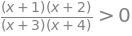

In [11]:
x=sp.Symbol('x')
express_str=f" (x+1)*(x+2)/((x+3)*(x+4))>0"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

In [12]:
x=sp.Symbol('x')
express_str=f" (x/((x+1)*(x+2)))>1"       # f(x)= ax + b > c
fx=parse_expr(express_str, evaluate=False) #字串解釋為可運算式子 expression 
St=fx
Val=solve_univariate_inequality(fx,x)      #solve_univariate_inequality 解不等式  
display(St)
display(Val)

## 高三 餘式定理
https://docs.sympy.org/latest/modules/polys/reference.html

Remainder

Compute polynomial remainder of f and g.

Polynomial division with remainder of f by g.

Examples
```python
from sympy import Poly
from sympy.abc import x
Poly(x**2 + 1, x).div(Poly(2*x - 4, x))
```
(Poly(1/2*x + 1, x, domain='QQ'), Poly(5, x, domain='QQ'))
```python
Poly(x**2 + 1, x).div(Poly(2*x - 4, x), auto=False)
```
(Poly(0, x, domain='ZZ'), Poly(x**2 + 1, x, domain='ZZ'))


In [14]:
x=sp.Symbol('x')
from sympy import div,pdiv,rem,ZZ,QQ
f1=2* x**4 +3*x**3-2*x**2-4*x+1
f2=(2*x+3)*(x-3)
display(div(f1,f2,domain=QQ)) ##rationals
display(div(x**2+1,2*x-4,domain=QQ)) ##rationals
display(rem(x**2+1,2*x-4,domain=QQ))

In [13]:
x=sp.Symbol('x')
from sympy import div,pdiv,rem,ZZ,QQ
display(div(x**3+2*x**2-4*x+1,x+1,domain=ZZ))
display(div(x**3+2*x**2-4*x+1,x+1,domain=QQ))
display(pdiv(x**3+2*x**2-4*x+1,x+1))
f1=2* x**4 +3*x**3-2*x**2-4*x+1
f2=(2*x+3)*(x-3)
display(pdiv(f1,f2 ))
display(div(f1,f2,domain=ZZ))
display(div(f1,f2,domain=QQ))
display(rem(f1,f2,domain=ZZ))
display(rem(f1,f2,domain=QQ))
display(rem(x**2+1,2*x-4,domain=ZZ))
display(div(x**2+1,2*x-4,domain=ZZ))  ##Integers




```python
print("end")

display(HTML( (x <= -1) & (-oo < x)
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(row[_]) for _ in row)) for row in NTE)
       )
))
```

In [ ]:
import re
r3=re.findall('x[ ]*[≠][ ]*[-]?\d+[ ]*[/]?[ ]*\d*', 'x ≠  1')
for l_ in r3:
    s_="Ne(%s)" % l_.replace('≠',",")
    print(l_ ,s_)
r3=re.findall('x[ ]*[!][=][ ]*[-]?\d+[ ]*[/]?[ ]*\d*', 'x !=  1')
for l_ in r3:
    s_="Ne(%s)" % l_.replace('!=',",")
    print(l_ ,s_)   